In [215]:
import numpy as np # linear algebra
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

In [216]:
trainDF = pd.read_csv(r'D:\Kaggle\data\train.csv')

testData = pd.read_csv(r'D:\Kaggle\data\test_extracted.csv')
actual_labels = testData['user']
testDF = testData.drop(columns=['user'])

# testDF = pd.read_csv(r'D:\Kaggle\data\test.csv')

In [217]:
# trainDF.head()

In [218]:
testDF

,press-0,release-0,press-1,release-1,press-2,release-2,press-3,release-3,press-4,release-4,...,press-8,release-8,press-9,release-9,press-10,release-10,press-11,release-11,press-12,release-12
0,1717927480098,1717927480182,1717927480315,1717927480438,1717927480575,1717927480710,1717927480748,1717927480875,1717927480987,1717927481122,...,1717927482170,1717927482284,1717927482561,1717927482742,1717927482828,1717927482934,1717927483059,1717927483212,1717927483355,1717927483474


In [219]:
print('No. of rows in training dataset:',len(trainDF))
print('No. of users for which training data is present:',trainDF.user.nunique( ))

No. of rows in training dataset: 897
No. of users for which training data is present: 112


In [220]:
print('No. of rows in test dataset:',len(testDF))

No. of rows in test dataset: 1


In [221]:
trainDF1 = trainDF
for i in range(1,13):
    trainDF1['PPD-'+str(i)] = trainDF1['press-'+str(i)] - trainDF1['press-'+str(i-1)]
    trainDF1['RPD-'+str(i)] = trainDF1['release-'+str(i)] - trainDF1['press-'+str(i-1)]

for i in range(13):
    trainDF1['HD-'+str(i)] = trainDF1['release-'+str(i)] - trainDF1['press-'+str(i)]
    
testDF1 = testDF
for i in range(1,13):
    testDF1['PPD-'+str(i)] = testDF1['press-'+str(i)] - testDF1['press-'+str(i-1)]
    testDF1['RPD-'+str(i)] = testDF1['release-'+str(i)] - testDF1['press-'+str(i-1)]

for i in range(13):
    testDF1['HD-'+str(i)] = testDF1['release-'+str(i)] - testDF1['press-'+str(i)]

In [222]:
trainDF1.head()

,user,press-0,release-0,press-1,release-1,press-2,release-2,press-3,release-3,press-4,...,HD-3,HD-4,HD-5,HD-6,HD-7,HD-8,HD-9,HD-10,HD-11,HD-12
0,1,0,120,216,312,424,496,592,664,808,...,72,48,72,96,48,48,72,72,48,72
1,1,0,95,168,265,360,455,527,599,736,...,72,71,71,71,56,48,47,72,72,48
2,1,0,71,143,231,783,903,1087,1159,1351,...,72,103,72,96,79,72,72,72,72,55
3,1,0,95,144,263,353,431,760,832,1159,...,72,48,50,91,47,72,48,72,72,72
4,1,0,70,166,238,310,406,526,598,710,...,72,48,72,96,72,72,62,72,72,96


In [223]:
trainDF1.columns

Index(['user', 'press-0', 'release-0', 'press-1', 'release-1', 'press-2',
       'release-2', 'press-3', 'release-3', 'press-4', 'release-4', 'press-5',
       'release-5', 'press-6', 'release-6', 'press-7', 'release-7', 'press-8',
       'release-8', 'press-9', 'release-9', 'press-10', 'release-10',
       'press-11', 'release-11', 'press-12', 'release-12', 'PPD-1', 'RPD-1',
       'PPD-2', 'RPD-2', 'PPD-3', 'RPD-3', 'PPD-4', 'RPD-4', 'PPD-5', 'RPD-5',
       'PPD-6', 'RPD-6', 'PPD-7', 'RPD-7', 'PPD-8', 'RPD-8', 'PPD-9', 'RPD-9',
       'PPD-10', 'RPD-10', 'PPD-11', 'RPD-11', 'PPD-12', 'RPD-12', 'HD-0',
       'HD-1', 'HD-2', 'HD-3', 'HD-4', 'HD-5', 'HD-6', 'HD-7', 'HD-8', 'HD-9',
       'HD-10', 'HD-11', 'HD-12'],
      dtype='object')

## TrainDF2

In [224]:
# Check stats of first 5 users i.e. 5 x 8 typing patterns
noOfUsers = 5
if noOfUsers == -1:
    trainDF2 = trainDF1
else:
    trainDF2 = trainDF1[:noOfUsers*8]

In [225]:
len(trainDF2)
# trainDF2

40

In [226]:
temp1 = pd.DataFrame({'Min':trainDF2.min(),'Max':trainDF2.max()})
temp1.head()


,Min,Max
user,1,5
press-0,0,0
release-0,0,120
press-1,0,253
release-1,78,360


Text(0.5, 1.0, 'Scatterplot of PPD vs RPD')

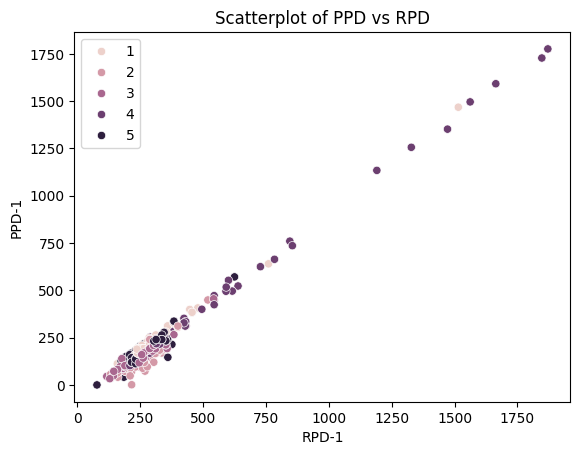

In [227]:
for i in range(1,13):
    ax = sns.scatterplot(x='RPD-'+str(i),y='PPD-'+str(i),hue='user',data=trainDF2)

# Small trick to avoid repeating legends: https://stackoverflow.com/a/36268401/5370202    
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:noOfUsers], labels[:trainDF2.user.nunique()])
ax.set_title('Scatterplot of PPD vs RPD')

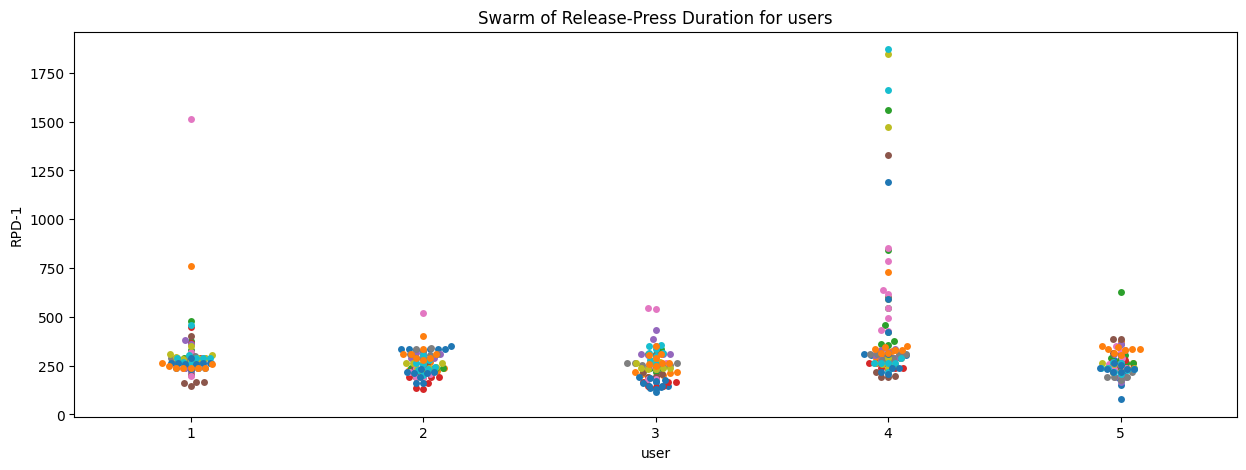

In [228]:
plt.figure(figsize=(15,5))
for i in range(1,13):
    sns.swarmplot(y='RPD-'+str(i),x='user',data=trainDF2).set_title('Swarm of Release-Press Duration for users')

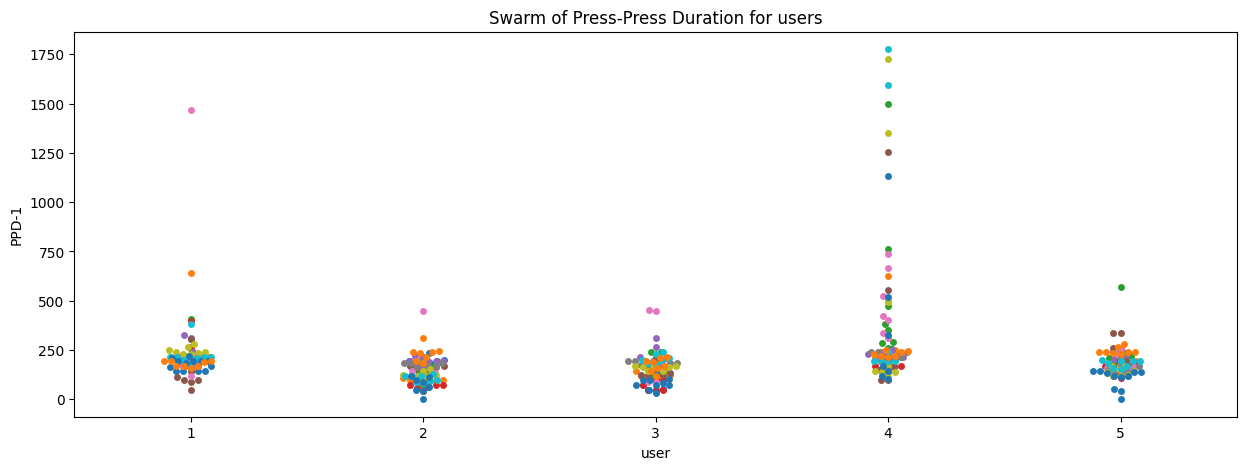

In [229]:
plt.figure(figsize=(15,5))
for i in range(1,13):
    sns.swarmplot(y='PPD-'+str(i),x='user',data=trainDF2).set_title('Swarm of Press-Press Duration for users')

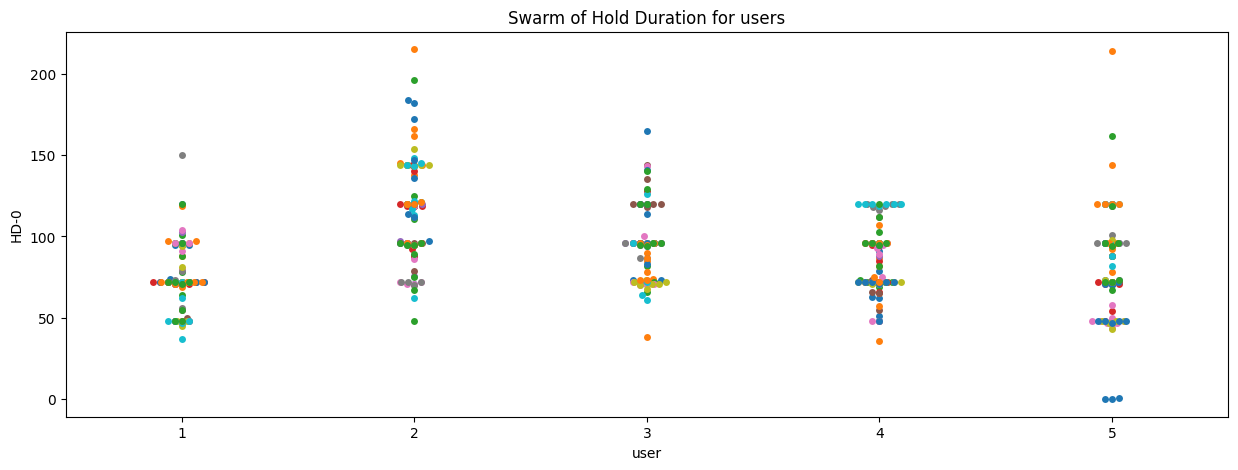

In [230]:
plt.figure(figsize=(15,5))
for i in range(13):
    sns.swarmplot(y='HD-'+str(i),x='user',data=trainDF2).set_title('Swarm of Hold Duration for users')

In [231]:
# value_vars_cols = ['HD-'+str(i) for i in range(13)]

drop_cols_HD_analysis = ['PPD-'+str(i) for i in range(1,13)] + ['RPD-'+str(i) for i in range(1,13)] + ['release-'+str(i) for i in range(13)]

trainDF_HD_analysis = trainDF2.drop(columns=drop_cols_HD_analysis)
trainDF_HD_analysis['id'] = trainDF_HD_analysis.index
trainDF_HD_analysis = pd.wide_to_long(trainDF_HD_analysis,['press-','HD-'],i='id',j='key_no').sort_values(by=['user','id','key_no'])
# trainDF_HD_analysis

In [232]:
# print(testDF_UserProps.columns)


<Axes: xlabel='press-', ylabel='HD-'>

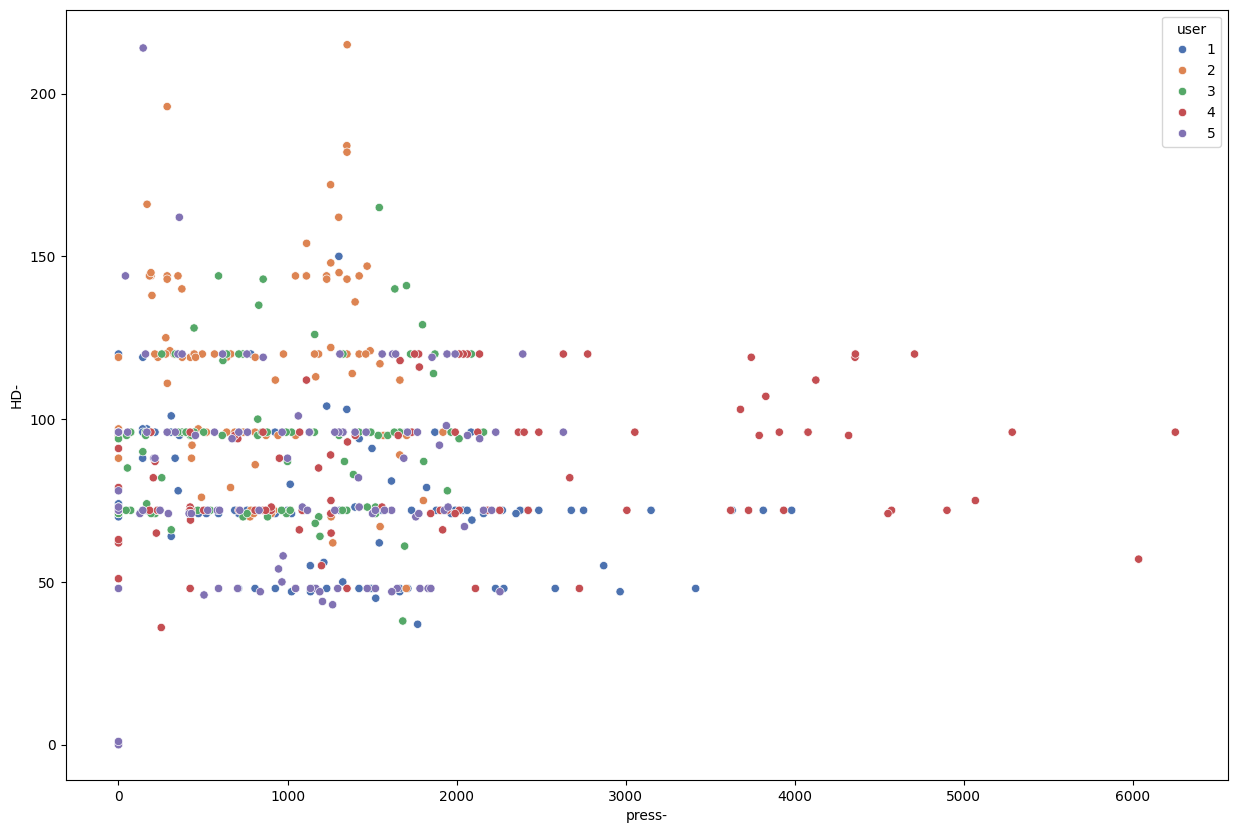

In [233]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='press-',y='HD-',hue='user',data=trainDF_HD_analysis,palette='deep')

Text(0.5, 1.0, 'Line plots for each key sequence')

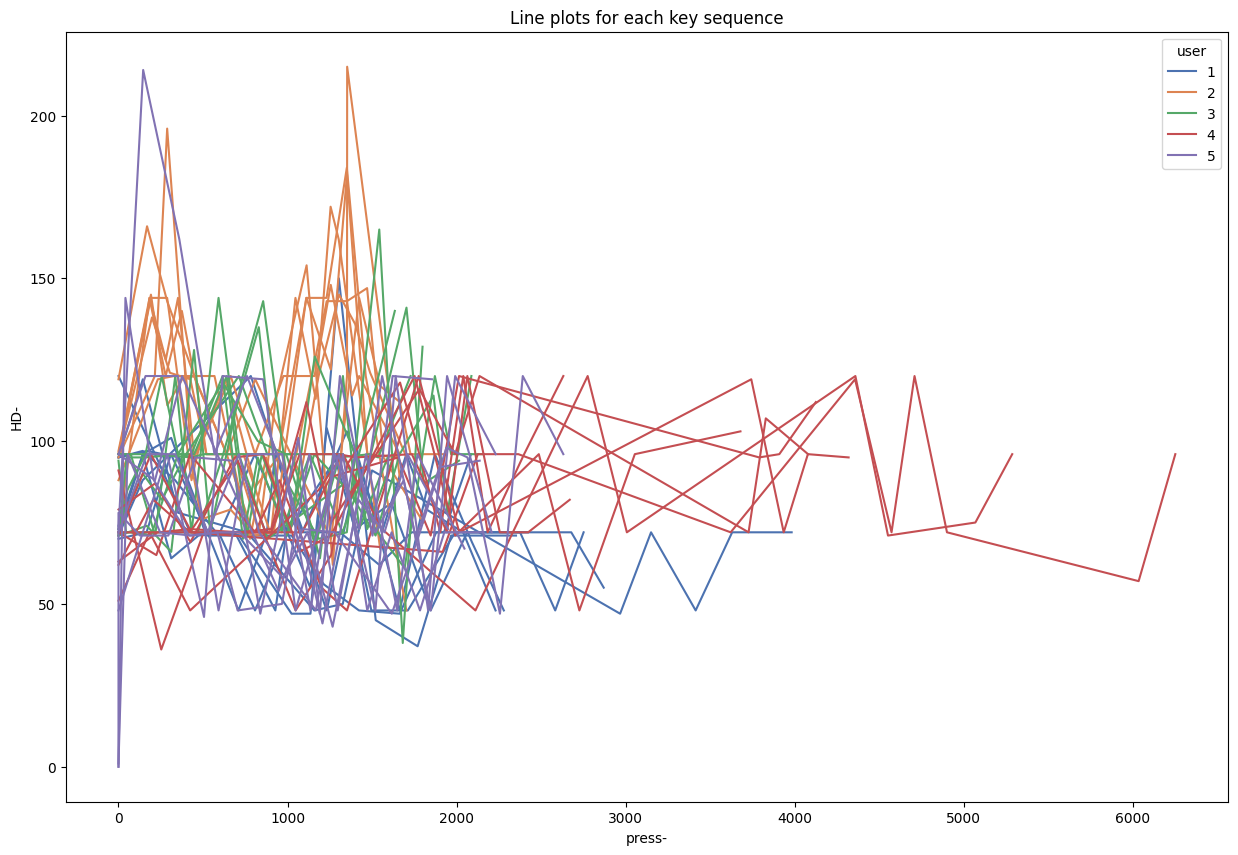

In [234]:
plt.figure(figsize=(15,10))
# sns.load_dataset(trainDF_HD_analysis)
sns.lineplot(x='press-',y='HD-',hue='user',units='id',estimator=None,data=trainDF_HD_analysis.reset_index(),palette='deep').set_title('Line plots for each key sequence')

In [235]:
# value_vars_cols = ['HD-'+str(i) for i in range(13)]

drop_cols_PPD_analysis = ['HD-'+str(i) for i in range(13)] + ['RPD-'+str(i) for i in range(1,13)] + ['release-'+str(i) for i in range(13)] + ['press-0']

trainDF_PPD_analysis = trainDF2.drop(columns=drop_cols_PPD_analysis)
trainDF_PPD_analysis['id'] = trainDF_PPD_analysis.index
trainDF_PPD_analysis = pd.wide_to_long(trainDF_PPD_analysis,['press-','PPD-'],i='id',j='key_no').sort_values(by=['user','id','key_no'])
# trainDF_PPD_analysis

<Axes: xlabel='press-', ylabel='PPD-'>

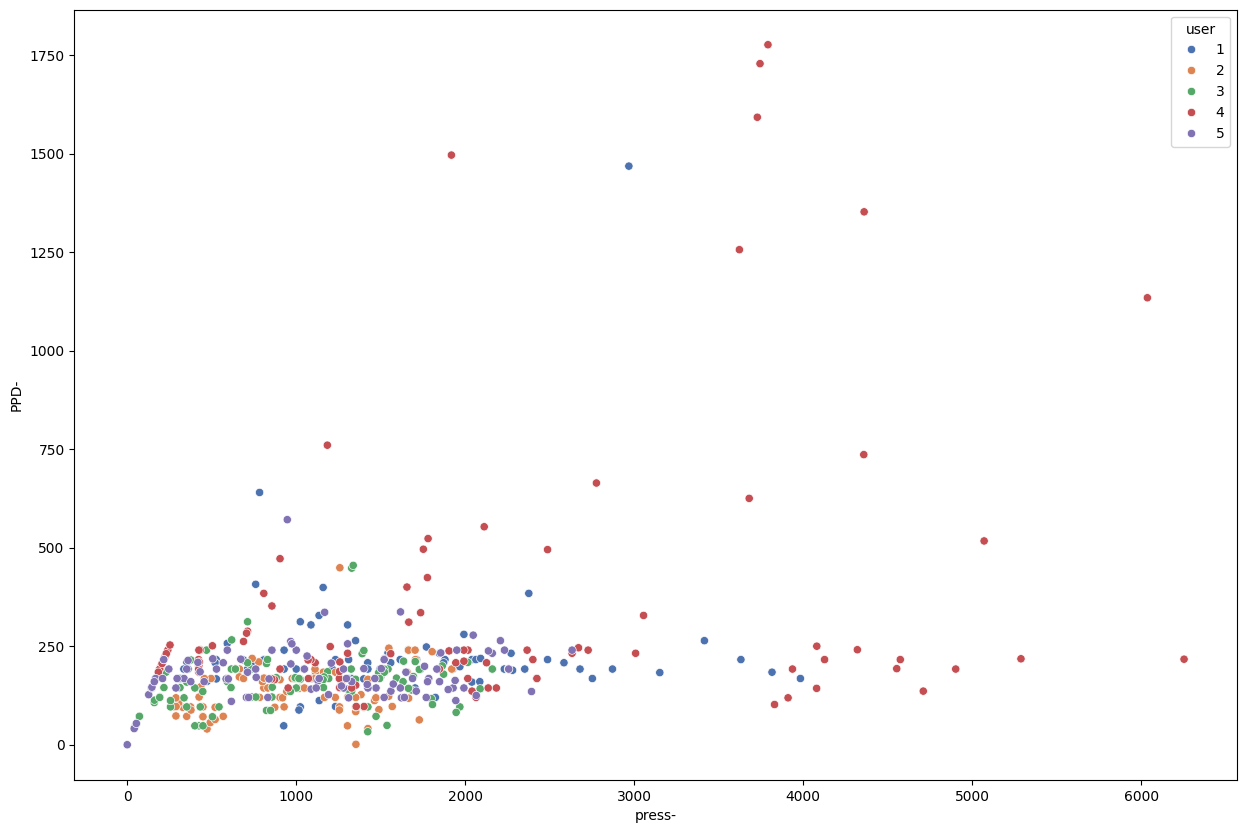

In [236]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='press-',y='PPD-',hue='user',data=trainDF_PPD_analysis,palette='deep')

Text(0.5, 1.0, 'Line plots for each key sequence')

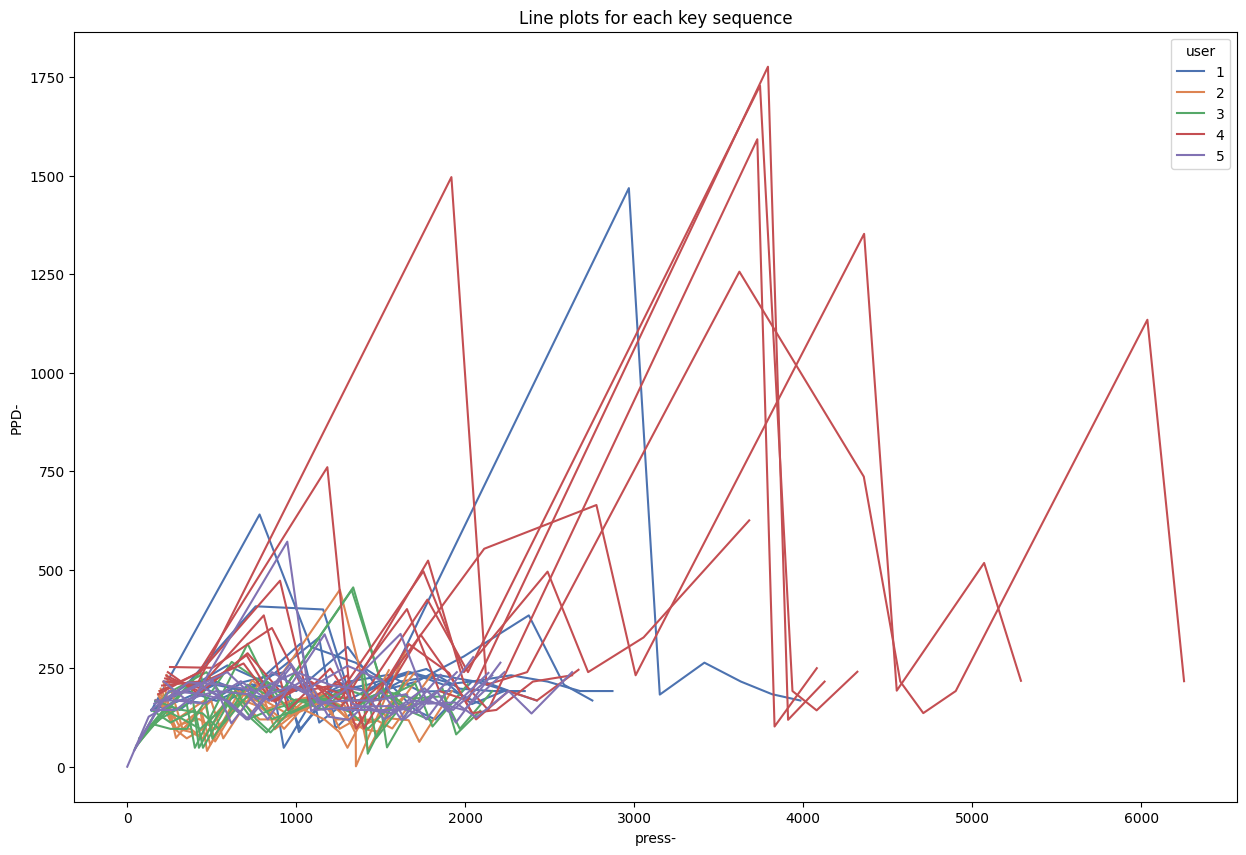

In [237]:
plt.figure(figsize=(15,10))
# sns.load_dataset(trainDF_HD_analysis)
sns.lineplot(x='press-',y='PPD-',hue='user',units='id',estimator=None,data=trainDF_PPD_analysis.reset_index(),palette='deep').set_title('Line plots for each key sequence')

In [238]:
# value_vars_cols = ['HD-'+str(i) for i in range(13)]

drop_cols_RPD_analysis = ['HD-'+str(i) for i in range(13)] + ['PPD-'+str(i) for i in range(1,13)] + ['release-'+str(i) for i in range(13)] + ['press-0']

trainDF_RPD_analysis = trainDF2.drop(columns=drop_cols_RPD_analysis)
trainDF_RPD_analysis['id'] = trainDF_RPD_analysis.index
trainDF_RPD_analysis = pd.wide_to_long(trainDF_RPD_analysis,['press-','RPD-'],i='id',j='key_no').sort_values(by=['user','id','key_no'])
# trainDF_RPD_analysis

<Axes: xlabel='press-', ylabel='RPD-'>

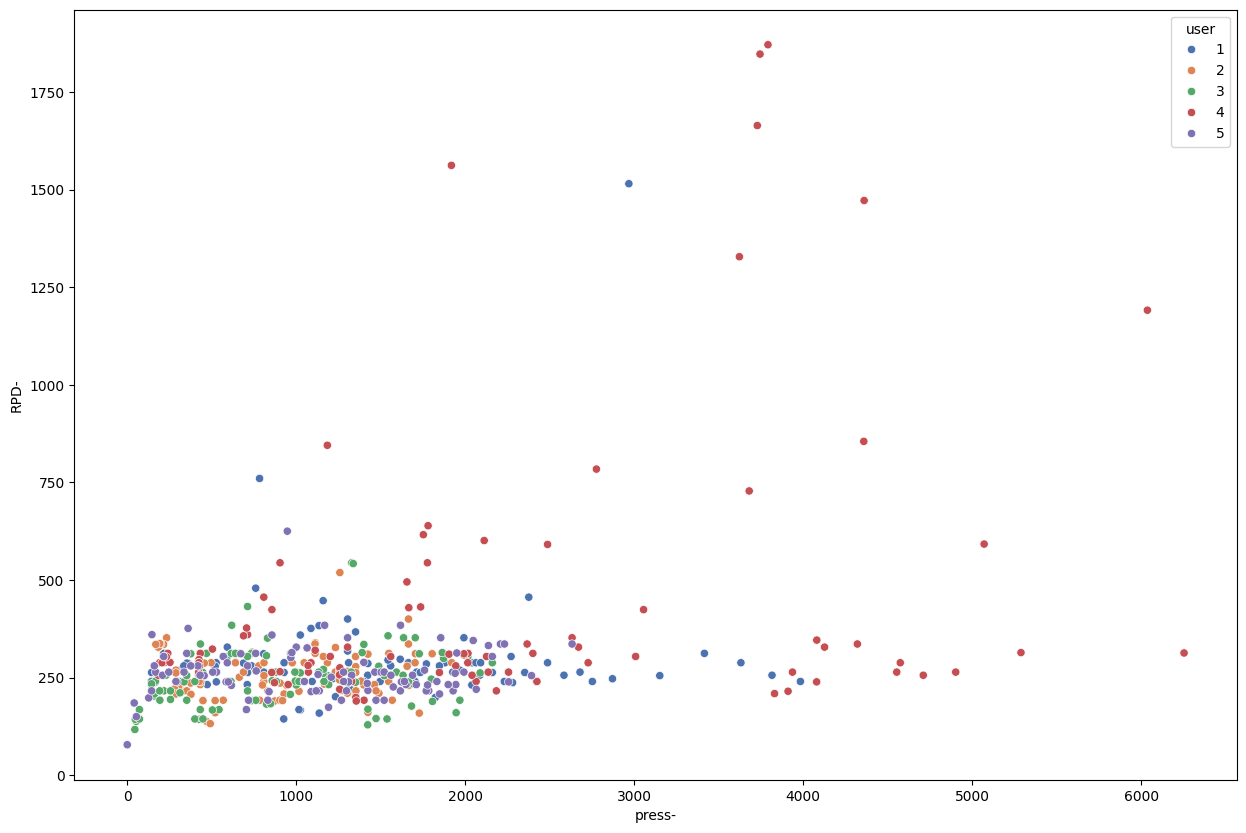

In [239]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='press-',y='RPD-',hue='user',data=trainDF_RPD_analysis,palette='deep')

Text(0.5, 1.0, 'Line plots for each key sequence')

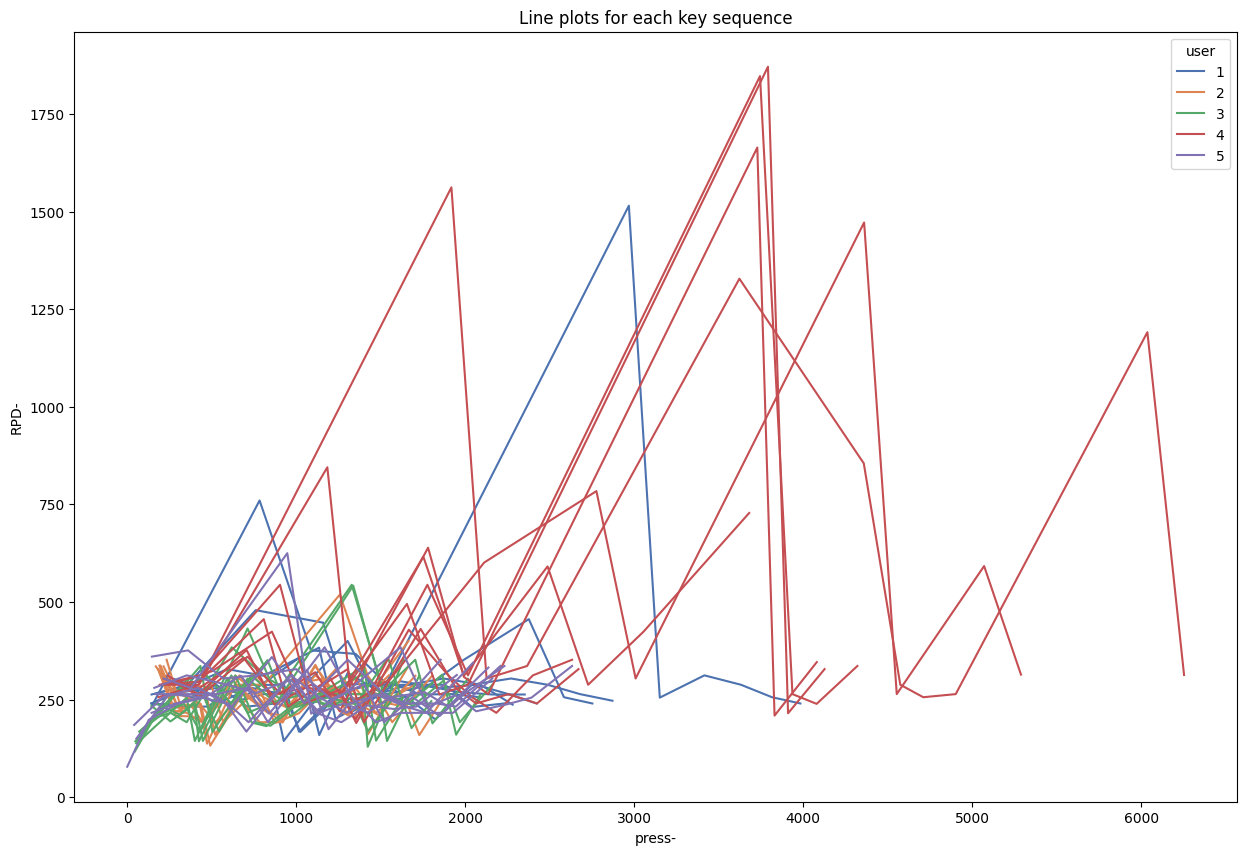

In [240]:
plt.figure(figsize=(15,10))
# sns.load_dataset(trainDF_HD_analysis)
sns.lineplot(x='press-',y='RPD-',hue='user',units='id',estimator=None,data=trainDF_RPD_analysis.reset_index(),palette='deep').set_title('Line plots for each key sequence')

In [241]:
## Training Data

# use HD
drop_cols_HD_analysis = ['PPD-'+str(i) for i in range(1,13)] + ['RPD-'+str(i) for i in range(1,13)] + ['release-'+str(i) for i in range(13)]

trainDF_HD_analysis = trainDF1.drop(columns=drop_cols_HD_analysis)
trainDF_HD_analysis['id'] = trainDF_HD_analysis.index
trainDF_HD_analysis = pd.wide_to_long(trainDF_HD_analysis,['press-','HD-'],i='id',j='key_no').sort_values(by=['user','id','key_no'])

# use ppd
drop_cols_PPD_analysis = ['HD-'+str(i) for i in range(13)] + ['RPD-'+str(i) for i in range(1,13)] + ['release-'+str(i) for i in range(13)] + ['press-0']

trainDF_PPD_analysis = trainDF1.drop(columns=drop_cols_PPD_analysis)
trainDF_PPD_analysis['id'] = trainDF_PPD_analysis.index
trainDF_PPD_analysis = pd.wide_to_long(trainDF_PPD_analysis,['press-','PPD-'],i='id',j='key_no').sort_values(by=['user','id','key_no'])

# use rpd
drop_cols_RPD_analysis = ['HD-'+str(i) for i in range(13)] + ['PPD-'+str(i) for i in range(1,13)] + ['release-'+str(i) for i in range(13)] + ['press-0']

trainDF_RPD_analysis = trainDF1.drop(columns=drop_cols_RPD_analysis)
trainDF_RPD_analysis['id'] = trainDF_RPD_analysis.index
trainDF_RPD_analysis = pd.wide_to_long(trainDF_RPD_analysis,['press-','RPD-'],i='id',j='key_no').sort_values(by=['user','id','key_no'])


## Test Data
testDF_HD_analysis = testDF1.drop(columns=drop_cols_HD_analysis)
testDF_HD_analysis['id'] = testDF_HD_analysis.index
testDF_HD_analysis = pd.wide_to_long(testDF_HD_analysis,['press-','HD-'],i='id',j='key_no').sort_values(by=['id','key_no'])

testDF_PPD_analysis = testDF1.drop(columns=drop_cols_PPD_analysis)
testDF_PPD_analysis['id'] = testDF_PPD_analysis.index
testDF_PPD_analysis = pd.wide_to_long(testDF_PPD_analysis,['press-','PPD-'],i='id',j='key_no').sort_values(by=['id','key_no'])

testDF_RPD_analysis = testDF1.drop(columns=drop_cols_RPD_analysis)
testDF_RPD_analysis['id'] = testDF_RPD_analysis.index
testDF_RPD_analysis = pd.wide_to_long(testDF_RPD_analysis,['press-','RPD-'],i='id',j='key_no').sort_values(by=['id','key_no'])

In [242]:
trainDF_HD_analysis.columns

Index(['user', 'press-', 'HD-'], dtype='object')

In [243]:
## Join these individual tables together
testDFCombined = testDF_HD_analysis.join(testDF_RPD_analysis.drop(columns=['press-']),rsuffix='RPD_').join(testDF_PPD_analysis.drop(columns=['press-']),rsuffix='PPD_')

trainDFCombined = trainDF_HD_analysis.join(trainDF_RPD_analysis.drop(columns=['user','press-']),rsuffix='RPD_').join(trainDF_PPD_analysis.drop(columns=['user','press-']),rsuffix='PPD_')


In [244]:
trainDFCombined.columns

Index(['user', 'press-', 'HD-', 'RPD-', 'PPD-'], dtype='object')

In [245]:
testDFCombined.columns

Index(['press-', 'HD-', 'RPD-', 'PPD-'], dtype='object')

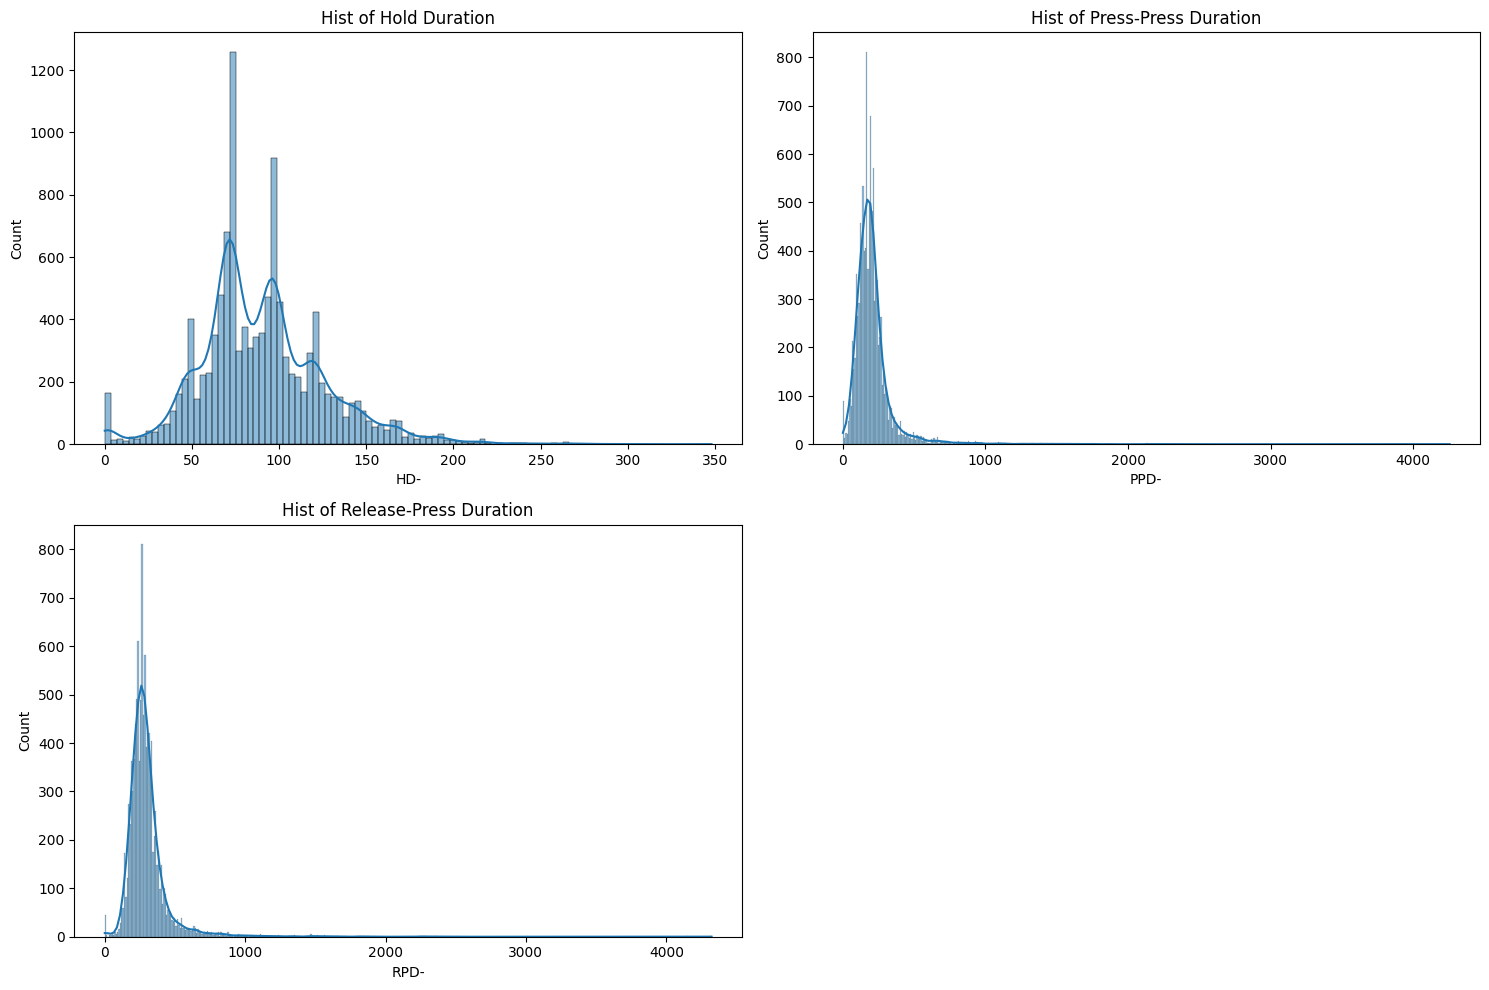

In [246]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(trainDFCombined['HD-'], kde=True).set_title('Hist of Hold Duration')

plt.subplot(2, 2, 2)
sns.histplot(trainDFCombined['PPD-'], kde=True).set_title('Hist of Press-Press Duration')

plt.subplot(2, 2, 3)
sns.histplot(trainDFCombined['RPD-'], kde=True).set_title('Hist of Release-Press Duration')

plt.tight_layout()
plt.show()

In [247]:
noOfBins = 10

## Training Data
HDMax = trainDFCombined['HD-'].max()
RPDMax = trainDFCombined['RPD-'].max()
PPDMax = trainDFCombined['PPD-'].max()
print('Max values in train are: HDMax:',HDMax,'RPDMax:',RPDMax,'PPDMax:',PPDMax)
labels = [i for i in range(noOfBins)]

trainDFCombined['HDEnc'],HDBins = pd.qcut(trainDFCombined['HD-'],retbins=True,labels=labels,q=noOfBins)
trainDFCombined['PPDEnc'],RPDBins = pd.qcut(trainDFCombined['PPD-'],retbins=True,labels=labels,q=noOfBins)
trainDFCombined['RPDEnc'],PPDBins = pd.qcut(trainDFCombined['RPD-'],retbins=True,labels=labels,q=noOfBins)

trainDFCombined['HDEnc'] = trainDFCombined['HDEnc'].astype(str).replace('nan',-1).astype(int)
trainDFCombined['PPDEnc'] = trainDFCombined['PPDEnc'].astype(str).replace('nan',-1).astype(float)
trainDFCombined['RPDEnc'] = trainDFCombined['RPDEnc'].astype(str).replace('nan',-1).astype(float)


## Test Data
HDMax = testDFCombined['HD-'].max()
RPDMax = testDFCombined['RPD-'].max()
PPDMax = testDFCombined['PPD-'].max()
print('Max values in test data are: HDMax:',HDMax,'RPDMax:',RPDMax,'PPDMax:',PPDMax)
labels = [i for i in range(noOfBins)]

testDFCombined['HDEnc'] = pd.cut(testDFCombined['HD-'],labels=labels,bins=HDBins)
testDFCombined['PPDEnc'] = pd.cut(testDFCombined['PPD-'],labels=labels,bins=RPDBins)
testDFCombined['RPDEnc'] = pd.cut(testDFCombined['RPD-'],labels=labels,bins=PPDBins)

testDFCombined['HDEnc'] = testDFCombined['HDEnc'].astype(str).replace('nan',-1).astype(float)
testDFCombined['PPDEnc'] = testDFCombined['PPDEnc'].astype(str).replace('nan',-1).astype(float)
testDFCombined['RPDEnc'] = testDFCombined['RPDEnc'].astype(str).replace('nan',-1).astype(float)

Max values in train are: HDMax: 348 RPDMax: 4322.0 PPDMax: 4255.0
Max values in test data are: HDMax: 187 RPDMax: 572.0 PPDMax: 391.0


In [248]:
trainDFCombined.columns

Index(['user', 'press-', 'HD-', 'RPD-', 'PPD-', 'HDEnc', 'PPDEnc', 'RPDEnc'], dtype='object')

In [249]:
testDFCombined.columns

Index(['press-', 'HD-', 'RPD-', 'PPD-', 'HDEnc', 'PPDEnc', 'RPDEnc'], dtype='object')

In [250]:
## Lower limit values of bins created
HDBins, RPDBins, PPDBins, 'No. of buckets: '+str(len(HDBins)-1)

(array([  0.,  48.,  65.,  72.,  75.,  87.,  96., 101., 119., 136., 348.]),
 array([   0.,   96.,  123.,  145.,  167.,  184.,  200.,  220.,  252.,
         313., 4255.]),
 array([   0. ,  183. ,  213. ,  236. ,  256. ,  272. ,  292. ,  316. ,
         351. ,  417.7, 4322. ]),
 'No. of buckets: 10')

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 19.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 17.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 19.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Pytho

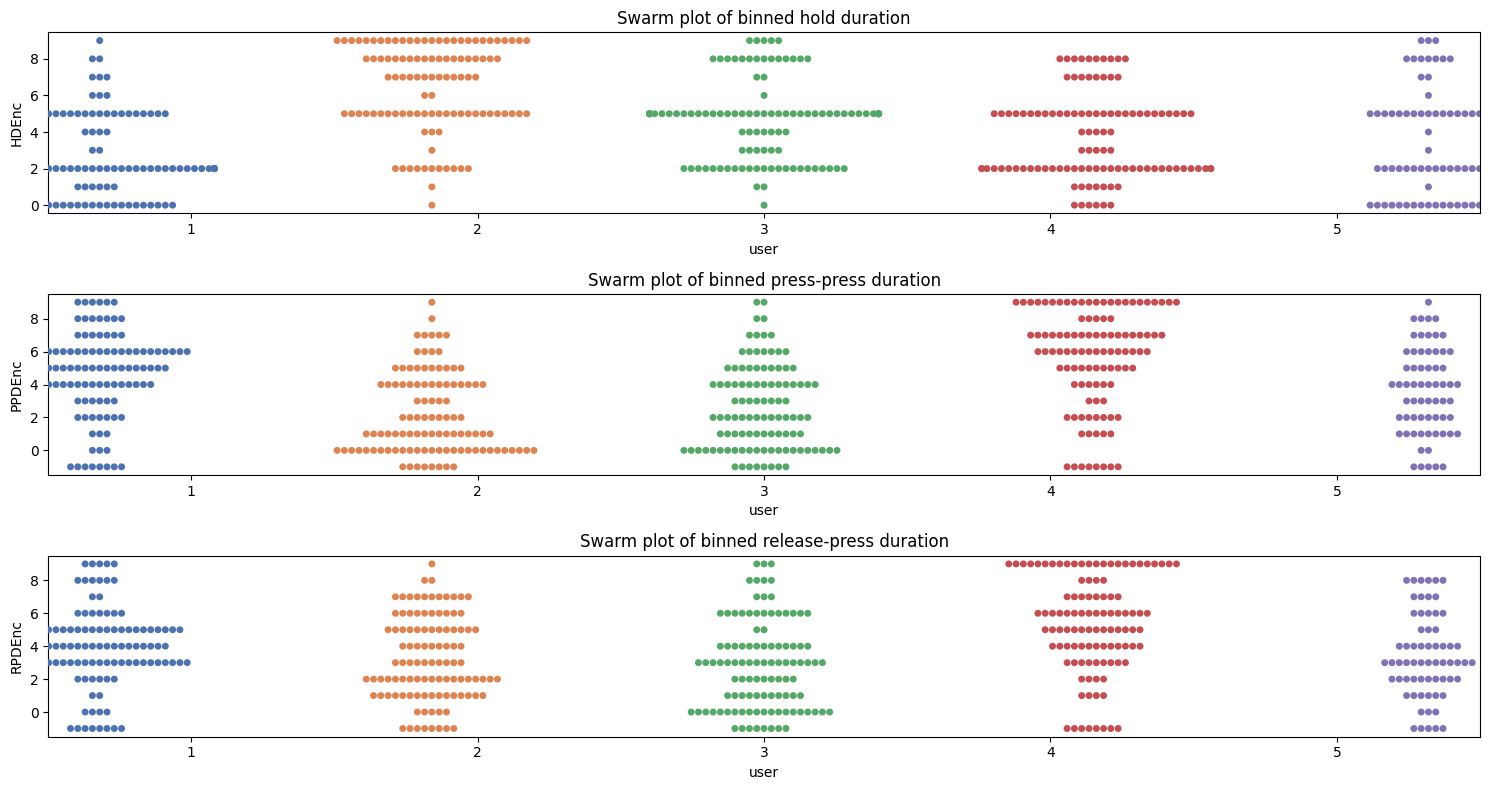

In [251]:
plt.figure(figsize=(15, 8))
noOfUsers = 5

plt.subplot(3, 1, 1)
sns.swarmplot(y='HDEnc', x='user', hue='user', data=trainDFCombined[:8*12*noOfUsers], palette='deep', dodge=True).set_title('Swarm plot of binned hold duration')
plt.legend([],[], frameon=False)  # Hide legend

plt.subplot(3, 1, 2)
sns.swarmplot(y='PPDEnc', x='user', hue='user', data=trainDFCombined[:8*12*noOfUsers], palette='deep', dodge=True).set_title('Swarm plot of binned press-press duration')
plt.legend([],[], frameon=False)  # Hiaaaaade legend

plt.subplot(3, 1, 3)
sns.swarmplot(y='RPDEnc', x='user', hue='user', data=trainDFCombined[:8*12*noOfUsers], palette='deep', dodge=True).set_title('Swarm plot of binned release-press duration')
plt.legend([],[], frameon=False)  # Hide legend

plt.tight_layout()
plt.show()

In [252]:
trainDFCombinedHDAvg = trainDFCombined.reset_index().groupby(['user','key_no'])['HDEnc'].mean()
trainDFCombinedPPDAvg = trainDFCombined.reset_index().groupby(['user','key_no'])['PPDEnc'].mean()
trainDFCombinedRPDAvg = trainDFCombined.reset_index().groupby(['user','key_no'])['RPDEnc'].mean()
tempDF = pd.DataFrame({'HD':trainDFCombinedHDAvg,'PPD':trainDFCombinedPPDAvg,'RPD':trainDFCombinedRPDAvg})

trainDF_HDProperties = tempDF.reset_index().groupby('user')['HD'].apply(np.array)
trainDF_PPDProperties = tempDF.reset_index().groupby('user')['PPD'].apply(np.array)
trainDF_RPDProperties = tempDF.reset_index().groupby('user')['RPD'].apply(np.array)

trainDF_UserProps = pd.DataFrame({'HD':trainDF_HDProperties, 'PPD':trainDF_PPDProperties, 'RPD':trainDF_RPDProperties})

trainDF_UserProps = pd.DataFrame(trainDF_UserProps.HD.tolist(),index = trainDF_UserProps.index).add_prefix('HD_').join(
    pd.DataFrame(trainDF_UserProps.PPD.tolist(),index = trainDF_UserProps.index).add_prefix('PPD_')
).join(
    pd.DataFrame(trainDF_UserProps.RPD.tolist(),index = trainDF_UserProps.index).add_prefix('RPD_')
)

# Average bin keystrokes for each of the 110 users
# trainDF_UserProps

In [253]:
trainDFCombinedHDAvg = testDFCombined.reset_index().groupby(['id','key_no'])['HDEnc'].mean()
trainDFCombinedPPDAvg = testDFCombined.reset_index().groupby(['id','key_no'])['PPDEnc'].mean()
trainDFCombinedRPDAvg = testDFCombined.reset_index().groupby(['id','key_no'])['RPDEnc'].mean()
tempDF = pd.DataFrame({'HD':trainDFCombinedHDAvg,'PPD':trainDFCombinedPPDAvg,'RPD':trainDFCombinedRPDAvg})

trainDF_HDProperties = tempDF.reset_index().groupby('id')['HD'].apply(np.array)
trainDF_PPDProperties = tempDF.reset_index().groupby('id')['PPD'].apply(np.array)
trainDF_RPDProperties = tempDF.reset_index().groupby('id')['RPD'].apply(np.array)

testDF_UserProps = pd.DataFrame({'HD':trainDF_HDProperties, 'PPD':trainDF_PPDProperties, 'RPD':trainDF_RPDProperties})

testDF_UserProps = pd.DataFrame(testDF_UserProps.HD.tolist(),index = testDF_UserProps.index).add_prefix('HD_').join(
    pd.DataFrame(testDF_UserProps.PPD.tolist(),index = testDF_UserProps.index).add_prefix('PPD_')
).join(
    pd.DataFrame(testDF_UserProps.RPD.tolist(),index = testDF_UserProps.index).add_prefix('RPD_')
)

# Bin allocation 
# testDF_UserProps

In [254]:
testDF_UserProps.max().max()

9.0

In [255]:
trainDF_HDTemp = trainDFCombined.reset_index().groupby(['user','id'])['HDEnc'].apply(np.array)
trainDF_PPDTemp = trainDFCombined.reset_index().groupby(['user','id'])['PPDEnc'].apply(np.array)
trainDF_RPDTemp = trainDFCombined.reset_index().groupby(['user','id'])['RPDEnc'].apply(np.array)

trainDF_User_AllSampleProps = pd.DataFrame({'HD':trainDF_HDTemp, 'PPD':trainDF_PPDTemp, 'RPD':trainDF_RPDTemp})

trainDF_User_AllSampleProps = pd.DataFrame(trainDF_User_AllSampleProps.HD.tolist(),index = trainDF_User_AllSampleProps.index).add_prefix('HD_').join(
    pd.DataFrame(trainDF_User_AllSampleProps.PPD.tolist(),index = trainDF_User_AllSampleProps.index).add_prefix('PPD_')
).join(
    pd.DataFrame(trainDF_User_AllSampleProps.RPD.tolist(),index = trainDF_User_AllSampleProps.index).add_prefix('RPD_')
).reset_index().set_index('user').drop(columns=['id'])

# trainDF_User_AllSampleProps

In [256]:
trainDF_HDTemp = testDFCombined.reset_index().groupby(['id'])['HDEnc'].apply(np.array)
trainDF_PPDTemp = testDFCombined.reset_index().groupby(['id'])['PPDEnc'].apply(np.array)
trainDF_RPDTemp = testDFCombined.reset_index().groupby(['id'])['RPDEnc'].apply(np.array)

testDF_User_AllSampleProps = pd.DataFrame({'HD':trainDF_HDTemp, 'PPD':trainDF_PPDTemp, 'RPD':trainDF_RPDTemp})

testDF_User_AllSampleProps = pd.DataFrame(testDF_User_AllSampleProps.HD.tolist(),index = testDF_User_AllSampleProps.index).add_prefix('HD_').join(
    pd.DataFrame(testDF_User_AllSampleProps.PPD.tolist(),index = testDF_User_AllSampleProps.index).add_prefix('PPD_')
).join(
    pd.DataFrame(testDF_User_AllSampleProps.RPD.tolist(),index = testDF_User_AllSampleProps.index).add_prefix('RPD_')
)

# testDF_User_AllSampleProps

In [257]:
# trainDF_UserProps

In [258]:
# trainDF_User_AllSampleProps

KNN

In [259]:
knn_summary = KNeighborsClassifier(1)
trainX_summary = trainDF_UserProps.reset_index().drop(columns=['user'])
trainY_summary = trainDF_UserProps.index

# testX_summary = testDF_UserProps.reset_index().drop(columns=['id'])

knn_summary.fit(trainX_summary,trainY_summary)

accuracy_score(knn_summary.predict(trainX_summary),trainY_summary)

1.0

Accuracies: [0.6688888888888889, 0.6088888888888888, 0.6166666666666667, 0.6311111111111111, 0.64, 0.62, 0.6266666666666667]


Text(0.5, 1.0, 'Cross-Val Accuracy v/s no. of neighbours')

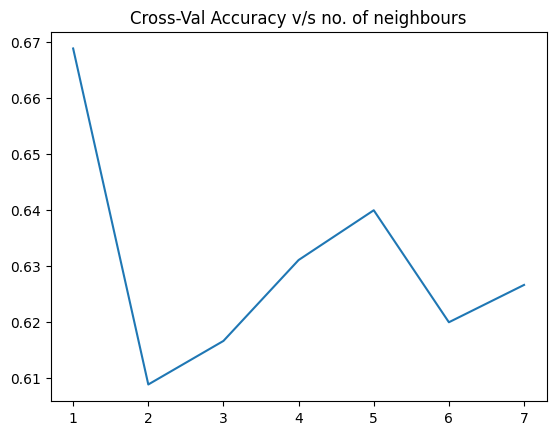

In [260]:
trainX_allSamples = trainDF_User_AllSampleProps.reset_index().drop(columns=['user'])
trainY_allSamples = trainDF_User_AllSampleProps.index

def getCrossValidationAccuracy(n_neighbours):
    knn_allSamples = KNeighborsClassifier(n_neighbours)
    sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    acc = []
    for train_index, test_index in sss.split(trainX_allSamples, trainY_allSamples):
        knn_allSamples.fit(trainX_allSamples.loc[train_index],trainY_allSamples[train_index])
        acc += [accuracy_score(knn_allSamples.predict(trainX_allSamples.loc[test_index]),trainY_allSamples[test_index])]
    return sum(acc) / len(acc)
allAttemptsAcc = [getCrossValidationAccuracy(i) for i in range(1,8)]
print('Accuracies:',allAttemptsAcc)
sns.lineplot(y=allAttemptsAcc,x=range(1,8)).set_title('Cross-Val Accuracy v/s no. of neighbours')

In [261]:
knn_allSamples = KNeighborsClassifier(1)
knn_allSamples.fit(trainX_allSamples,trainY_allSamples)

testX_allSamples = testDF_User_AllSampleProps.reset_index().drop(columns=['id'])
textPreds_allSamples = knn_allSamples.predict(testX_allSamples)
pd.DataFrame({'user':textPreds_allSamples},index=testX_allSamples.index).to_csv('submission.csv',index=False)

In [262]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import joblib

# Assuming trainDF_User_AllSampleProps is your training DataFrame
trainX_allSamples = trainDF_User_AllSampleProps.reset_index().drop(columns=['user'])
trainY_allSamples = trainDF_User_AllSampleProps.index

# Train the KNN model
knn_allSamples = KNeighborsClassifier(1)
knn_allSamples.fit(trainX_allSamples, trainY_allSamples)

# Save the trained model to a file
model_filename = r'D:\Kaggle\data\models\knn_allSamples_model.joblib'
joblib.dump(knn_allSamples, model_filename)


['D:\\Kaggle\\data\\models\\knn_allSamples_model.joblib']

In [263]:
import pandas as pd
from sklearn.metrics import accuracy_score
import joblib

# Load the trained model from the specified path
model_path = r'D:\Kaggle\data\models\knn_allSamples_model.joblib'
knn_allSamples = joblib.load(model_path)

# Load the test data (assuming testDF_User_AllSampleProps is your test DataFrame)
testX_allSamples = testDF_User_AllSampleProps.reset_index().drop(columns=['id'])
true_labels =  actual_labels

# Make predictions on the test data
predicted_labels = knn_allSamples.predict(testX_allSamples)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

# Create a DataFrame to show true and predicted labels
results_df = pd.DataFrame({
    'True Labels': true_labels,
    'Predicted Labels': predicted_labels
})

print("True and Predicted Labels:")
print(results_df)


Accuracy: 0.0
True and Predicted Labels:
   True Labels  Predicted Labels
0          111                66


MY XGBoost

In [267]:
import xgboost as xgb
from xgboost import XGBClassifier

# Create the XGBClassifier model with the provided parameters
xgb_model = XGBClassifier(
    base_score=0.5, 
    booster='gbtree', 
    colsample_bylevel=1,
    colsample_bynode=1, 
    colsample_bytree=0.8, 
    gamma=0, 
    gpu_id=-1,
    importance_type='gain', 
    interaction_constraints='',
    learning_rate=0.1, 
    max_delta_step=0, 
    max_depth=4,
    min_child_weight=3, 
    missing=None,  # Change `nan` to `None`
    monotone_constraints='()', 
    n_estimators=270, 
    n_jobs=4, 
    nthread=4, 
    num_class=110,
    num_parallel_tree=1, 
    objective='multi:softprob', 
    random_state=27,
    reg_alpha=0, 
    reg_lambda=1, 
    scale_pos_weight=None, 
    seed=27,
    subsample=0.8, 
    tree_method='exact', 
    validate_parameters=1,
    verbosity=None
)

# Print the model to verify
print(xgb_model)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy=None, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=4, max_leaves=None, min_child_weight=3, missing=None,
              monotone_constraints='()', multi_strategy=None, n_estimators=270,
              n_jobs=4, nthread=4, ...)


In [270]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the train and test datasets
trainX_allSamples = pd.read_csv(r'D:\Kaggle\data\train_features.csv')
trainY_allSamples = pd.read_csv(r'D:\Kaggle\data\train_labels.csv')
testDF = pd.read_csv(r'D:\Kaggle\data\test_extracted.csv')

# Extract the 'user' column as the actual labels from the test set
true_labels = testDF['user']
testX_allSamples = testDF.drop(columns=['user'])

# Encode class labels to start from 0
label_encoder = LabelEncoder()
trainY_encoded = label_encoder.fit_transform(trainY_allSamples)

# Create the XGBClassifier model
xgb_model = XGBClassifier(
    base_score=0.5, 
    booster='gbtree', 
    colsample_bylevel=1,
    colsample_bynode=1, 
    colsample_bytree=0.8, 
    gamma=0, 
    gpu_id=-1,
    importance_type='gain', 
    interaction_constraints='',
    learning_rate=0.1, 
    max_delta_step=0, 
    max_depth=4,
    min_child_weight=3, 
    monotone_constraints='()', 
    n_estimators=270, 
    n_jobs=4, 
    nthread=4, 
    num_class=110,
    num_parallel_tree=1, 
    objective='multi:softprob', 
    random_state=27,
    reg_alpha=0, 
    reg_lambda=1, 
    scale_pos_weight=None, 
    seed=27,
    subsample=0.8, 
    tree_method='exact', 
    validate_parameters=1,
    verbosity=None
)

# Train the model
xgb_model.fit(trainX_allSamples, trainY_encoded)

# Make predictions
predicted_labels_encoded = xgb_model.predict(testX_allSamples)

# Decode the predicted labels back to the original labels
predicted_labels = label_encoder.inverse_transform(predicted_labels_encoded)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

# Display true and predicted labels
results_df = pd.DataFrame({
    'True Labels': true_labels,
    'Predicted Labels': predicted_labels
})

print("True and Predicted Labels:")
print(results_df)


ValueError: feature_names mismatch: ['HD_0', 'HD_1', 'HD_2', 'HD_3', 'HD_4', 'HD_5', 'HD_6', 'HD_7', 'HD_8', 'HD_9', 'HD_10', 'HD_11', 'HD_12', 'PPD_0', 'PPD_1', 'PPD_2', 'PPD_3', 'PPD_4', 'PPD_5', 'PPD_6', 'PPD_7', 'PPD_8', 'PPD_9', 'PPD_10', 'PPD_11', 'PPD_12', 'RPD_0', 'RPD_1', 'RPD_2', 'RPD_3', 'RPD_4', 'RPD_5', 'RPD_6', 'RPD_7', 'RPD_8', 'RPD_9', 'RPD_10', 'RPD_11', 'RPD_12'] ['user']
expected HD_8, HD_4, RPD_8, HD_6, RPD_11, RPD_10, PPD_1, RPD_4, PPD_2, PPD_9, RPD_7, PPD_3, RPD_2, HD_11, PPD_7, RPD_6, HD_2, HD_5, PPD_0, HD_7, HD_0, HD_9, RPD_12, RPD_3, PPD_5, PPD_4, PPD_6, PPD_11, RPD_0, PPD_10, HD_10, RPD_9, PPD_8, HD_1, RPD_5, PPD_12, RPD_1, HD_3, HD_12 in input data
training data did not have the following fields: user

XGBoost

In [268]:
%%time
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Encode class labels to start from 0
label_encoder = LabelEncoder()
trainY_encoded = label_encoder.fit_transform(trainY_allSamples)

xgb1 = XGBClassifier(
    learning_rate=0.1,
    n_estimators=10,
    max_depth=5,
    min_child_weight=3,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softmax',
    num_class=len(label_encoder.classes_),  # Use the number of unique classes after encoding
    nthread=4,
    seed=27
)

param_search = {
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200, 210, 230, 250, 270, 290, 310, 330],
    'max_depth': range(4, 10, 1)
}

gsearch2b = GridSearchCV(
    estimator=xgb1,
    param_grid=param_search,
    scoring='accuracy',
    n_jobs=4,
    cv=StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=0),
    verbose=1
)

gsearch2b.fit(trainX_allSamples, trainY_encoded)


Fitting 3 folds for each of 108 candidates, totalling 324 fits


KeyboardInterrupt: 

In [ ]:
# trainY_encoded

In [ ]:
print("Shape of trainX_allSamples:", trainX_allSamples.shape)
print("Shape of trainY_encoded:", trainY_encoded.shape)


In [ ]:
print('Best Estimator:\n',gsearch2b.best_estimator_)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
accs = []

for train_index, test_index in sss.split(trainX_allSamples, trainY_encoded):
    gsearch2b.best_estimator_.fit(trainX_allSamples.iloc[train_index], trainY_encoded[train_index])
    predictions = gsearch2b.best_estimator_.predict(trainX_allSamples.iloc[test_index])
    acc = accuracy_score(predictions, trainY_encoded[test_index])
    print('Accuracy Score:', acc)
    accs.append(acc)

print('Average Accuracy:', sum(accs) / len(accs))


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode class labels to start from 0
label_encoder = LabelEncoder()
trainY_encoded = label_encoder.fit_transform(trainY_allSamples)

# Fit the best estimator on the training data
gsearch2b.best_estimator_.fit(trainX_allSamples, trainY_encoded)

# Make predictions on the test data
testX_allSamples = testDF_User_AllSampleProps.reset_index().drop(columns=['id'])
textPreds_allSamples = gsearch2b.best_estimator_.predict(testX_allSamples)

# Create a DataFrame with 'idx' and 'user' columns and save it to a CSV file
submission_df = pd.DataFrame({'idx': testX_allSamples.index, 'user': textPreds_allSamples})
submission_df.to_csv('submission.csv', index=False)


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Encode class labels to start from 0
label_encoder = LabelEncoder()
trainY_encoded = label_encoder.fit_transform(trainY_allSamples)

# Fit the best estimator on the training data
gsearch2b.best_estimator_.fit(trainX_allSamples, trainY_encoded)

# Make predictions on the test data
testX_allSamples = testDF_User_AllSampleProps.reset_index().drop(columns=['id'])
textPreds_allSamples = gsearch2b.best_estimator_.predict(testX_allSamples)

# Get the actual indices of the test data
actual_indices = testDF_User_AllSampleProps.reset_index().index

# Create a DataFrame with 'idx', 'user', and 'actual_index' columns
submission_df = pd.DataFrame({'idx': testX_allSamples.index, 
                              'user': textPreds_allSamples, 
                              'actual_index': actual_indices})

# Save it to a CSV file
submission_df.to_csv('submission.csv', index=False)


In [ ]:
len(trainDF.columns)

In [ ]:
pd.set_option('display.max_rows', None)
# Fit the KNN model on the training data
knn_summary.fit(trainX_summary, trainY_summary)

# Predict using the KNN model on the training data
train_preds = knn_summary.predict(trainX_summary)

# Create a DataFrame to store actual and predicted values
comparison_df = pd.DataFrame({'Actual': trainY_summary, 'Predicted': train_preds})

# Display the first few rows of the DataFrame
print(comparison_df)

